In [1]:
# Libraries
import numpy as np
from sklearn.metrics.pairwise import rbf_kernel
import matplotlib.pyplot as plt

# Define the true function f*
def f_star(x):
    return np.abs(x - 0.5) - 0.5

# Generate n observations
n = 100
X = np.linspace(0, 1, n)
y = f_star(X) + np.random.normal(0, 1, n)


In [2]:
# Define the kernel functions
def min_kernel(X1, X2):
    return np.minimum.outer(X1, X2)

def gaussian_kernel(X1, X2, sigma=0.1):
    return rbf_kernel(X1.reshape(-1, 1), X2.reshape(-1, 1), gamma=1/sigma**2)

# Define the gradient descent update
def gradient_descent(X, y, kernel, alpha=0.25, num_iters=100):
    n = len(X)
    K = kernel(X, X)
    theta = np.zeros(n)
    error = []
    for i in range(num_iters):
        grad = 2/n * K.dot(theta) - 2/n * y
        theta -= alpha * grad
        # Calculate the squared prediction error
        f_t = K.dot(theta)
        error_t = np.sum((f_t - f_star(X))**2) / n
        error.append(error_t)
    return theta, error


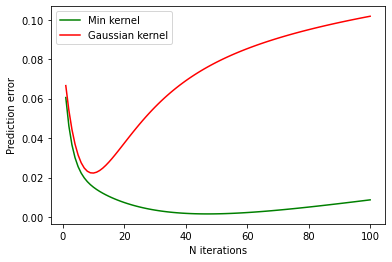

In [3]:
# Run the experiment with the min kernel
theta_min, error_min = gradient_descent(X, y, min_kernel)

# Run the experiment with the Gaussian kernel
theta_gaussian, error_gaussian = gradient_descent(X, y, gaussian_kernel)

# Plot the squared prediction error as a function of iteration number
fig, ax = plt.subplots()
ax.plot(range(1, len(error_min)+1), error_min, label="Min kernel", color = "green")
ax.plot(range(1, len(error_gaussian)+1), error_gaussian, label="Gaussian kernel", color = "red")
ax.set_xlabel("N iterations")
ax.set_ylabel("Prediction error")
ax.legend()
plt.savefig('ploty.pdf', dpi=300, bbox_inches='tight')
plt.show()
